<a href="https://colab.research.google.com/github/VitaliyKiwi/ambrosia/blob/master/ambrosia_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install google_images_download

In [1]:
pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-e22d0rhg
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-e22d0rhg
     |████████████████████████████████| 911kB 2.6MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15793 sha256=3780d1256c399b3341e68ca5140bc3cb1ab48750beec1df3fcc558516813aa4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-jvimam5t/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [2]:
from google_images_download import google_images_download

In [33]:
arguments = {
  "type": "photo",
    "keywords": "ragweed, goldenrod, herb",
    "limit": 100
}

In [4]:
def download_images(arguments):
    response = google_images_download.googleimagesdownload()
    paths = response.download(arguments)
    print('Completed.')

In [5]:
download_images(arguments)


Item no.: 1 --> Item name = ragweed
Evaluating...
Starting Download...
Completed Image ====> 1.ambrosia_psilostachya_kz1.jpg
Completed Image ====> 2.ambrosia_trifida_inflorescences.jpg
Completed Image ====> 3.ragweed.jpg
Completed Image ====> 4.vmzzckdq9nuosp3pci3lyc-320-80.jpg
Completed Image ====> 5.common-ragweed-gettyimages-597059597-58daaf9e5f9b58468364c72f.jpg
Completed Image ====> 6.fc8e5c7e-cc67-4e14-8d3d-dd693d78ae20_1140x641.png
Completed Image ====> 7.solidago-juncea-early-goldenrod_about-to-bloom_1000x750.jpg
Completed Image ====> 8.gettyimages-487835100.jpg
Completed Image ====> 9.og-ragweed-plants.jpg
Completed Image ====> 10.ragweed-woes-how-to-win-against-pollens-worst-offender-bt-630.png
Completed Image ====> 11.tumblr_inline_pg4q8lecqp1tiol9c_540.jpg
Completed Image ====> 12.ragweed-b-10p-sot-3-al.00_00_12_29.still001.jpg
Completed Image ====> 13.ann-ragweed-jpg_4-82020_20190819131417.jpg
Completed Image ====> 14.ambrosia_shutterstock_116210704.jpg
Completed Image ==

In [ ]:
import os
from PIL import Image

img_dir = r"/content/downloads/ragweed"
for filename in os.listdir(img_dir):
    try :
        with Image.open(img_dir + "/" + filename) as im:
             print('ok')
    except :
        print(img_dir + "/" + filename)
        os.remove(img_dir + "/" + filename)

Создание и тренировка **модели**

In [7]:
!pip3 install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-b6watacg
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-b6watacg
     |████████████████████████████████| 40kB 1.8MB/s 
  Created wheel for fastai: filename=fastai-2.0.12-cp36-none-any.whl size=184083 sha256=2ed1180b2d44af5b096f8ce8477a8f595ea583b31e4413454d1c223dd2e4965d
  Stored in directory: /tmp/pip-ephem-wheel-cache-jxjulf9n/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [8]:
import fastai

In [9]:
from fastai.vision.all import *

In [10]:
from fastai.vision.widgets import *

In [11]:
pwd

'/content'

In [12]:
 path = Path('downloads')
path

Path('downloads')

In [13]:
# get image dataset

fns = get_image_files(path)
fns

(#96) [Path('downloads/ragweed/7.solidago-juncea-early-goldenrod_about-to-bloom_1000x750.jpg'),Path('downloads/ragweed/98.large960_blur-969f0fab961926a1cdfd277be02ca8df.jpg'),Path('downloads/ragweed/12.ragweed-b-10p-sot-3-al.00_00_12_29.still001.jpg'),Path('downloads/ragweed/44.2016_giantragweed022smaller.jpg'),Path('downloads/ragweed/56.ragweed_hero.jpg'),Path('downloads/ragweed/14.ambrosia_shutterstock_116210704.jpg'),Path('downloads/ragweed/67.ragweed.jpg'),Path('downloads/ragweed/72.giant-ragweed-2.jpg'),Path('downloads/ragweed/77.5332ec21baced.image.jpg'),Path('downloads/ragweed/33.ambrosia-artemisiifolia-or-common-ragweed-has-fern-like-leaves.-this-image-was-taken-in-the-pre-flowering-stage..jpg')...]

In [ ]:
failed = verify_images(fns)
failed

======================================

In [15]:
# configure a DataBlock container
# blocks takes images and labels
# RandomSplitter splits dataset into 80% train and 20% valid sets
# item_tfms resizes images to 128x128

nasis = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=45),
    get_y=parent_label,
    item_tfms=Resize(128))

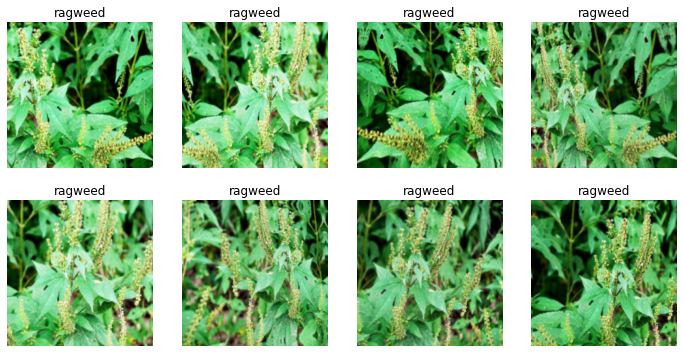

In [16]:
# initiate a new data block container
# tranform images using RandomResizedCrop
# transform image batches using aug_transforms
# create data loader with data path
# visualize train images with image augmentation

nasis = nasis.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = nasis.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [17]:
# create a cnn learner with resnet34 architecture
# use the data loader as input
# set error_rate as the metric
# train for 9 epochs

learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:02
1,0.000000,0.000000,0.000000,01:01
2,0.000000,0.000000,0.000000,01:01
3,0.000000,0.000000,0.000000,01:00
4,0.000000,0.000000,0.000000,00:59
5,0.000000,0.000000,0.000000,00:59
6,0.000000,0.000000,0.000000,01:01
7,0.000000,0.000000,0.000000,01:01
8,0.000000,0.000000,0.000000,00:59
9,0.000000,0.000000,0.000000,00:59


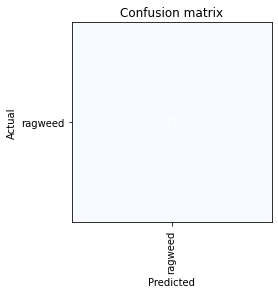

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

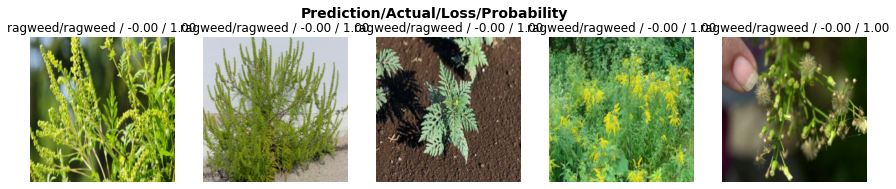

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

TypeError: ignored

In [21]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

NameError: ignored

Export learned model

In [22]:
learn.export()

In [23]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Predict test images using the trained model

In [24]:
learn_inf = load_learner(path/'export.pkl')

In [45]:
learn_inf.predict('/content/downloads/ ragweed/10.ragweed-woes-how-to-win-against-pollens-worst-offender-bt-630.png')

(' ragweed', tensor(1), tensor([1.2906e-05, 9.9989e-01, 9.8114e-05]))

In [25]:
learn_inf.dls.vocab

(#1) ['ragweed']

 Install the Voila library to make Jupyter Notebook as a webapp

In [26]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 5.9MB 2.9MB/s 
     |████████████████████████████████| 184kB 44.5MB/s 
Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?


In [27]:
#from utils import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [28]:
model_path = Path()
#model_path.ls(file_exts='.pkl')

In [29]:
learn_inf = load_learner(model_path/'export.pkl')

In [30]:
learn_inf.dls.vocab

(#1) ['ragweed']

In [31]:
def on_click_classify(change):
    lbl_pred.value = 'Минутку, подождите...'
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
btn_run.on_click(on_click_classify)
lbl_pred = widgets.Label()
out_pl = widgets.Output()

In [32]:
display(VBox([widgets.Label('Upload your nasi photo and press classify: (wait for a few seconds for the result)'), 
      btn_upload, btn_run, out_pl, lbl_pred]))